In [21]:
import numpy as np
from model_functions import *
from Classification_models_LOSO_2Class import *
import matplotlib.pyplot as plt

In this notebook: we test out different classification methods on the data with. In addition, we also experimented with different frequency bands, and epoch lengths and here only report the ones that performed best. We measure performance by Leave-One-Subject-Out cross-validation. This cross-validation method iterates through all subjects, iteratively leaves out one subject at a time, builds a model using the rest of the dataset, and then computes the confusion matrix for that model's predictions on the data corresponding to the left-out subject. The necessary functions to perform such a cross-validation are stored in "Classification_models_functions_LOSO_2Class.py" file. 

The following piece of code calculates and saves the relative band power data into your computer in the file path you write in config.py. You only need to run it once, and then comment it out. 

In [2]:
#uncomment to run and create the all_psds_very_long file. 

#subject_data, freqs, targets = load_data(duration=120,overlap=60,seg_length=4)
#save_psds(subject_data,freqs,targets,'all_psds_very_long.pickle')


In [3]:
subject_data, freqs, targets = load_psds('all_psds_very_long.pickle')
test_labels = align_test_labels(classes=['A','C'])
features, targets = remove_class(subject_data,targets,'F')
features, targets = remove_test(features,targets,test_labels)
rbps = [relative_band_power(features[i],freqs,freq_bands=[0.5,4.0,7.0,9.0,11.0,13.0,25.0]) 
        for i in range(len(features))]

In [4]:
rbps = remove_channel(rbps, ['F3','F4', 'C4', 'F8'])

In [5]:
sum(rbps[i].shape[0] for i in range(len(rbps)))

702

In [6]:
rbps[1].shape

(12, 15, 6)

In [34]:
# These variables will record the accuracies and corresponding models for various models to plot it later. 
accuracies = []
Models = []

### k nearest neighbor classifier

In [35]:
train_metric_dict, val_metric_dict = kNN_cross(rbps, targets, n_neighbors = 3, PCA_components = 0)
train_metric_dict, val_metric_dict

({'acc': 0.9882478632478633,
  'sens': 0.9897757255936676,
  'spec': 0.9864551083591331,
  'f1': 0.9891232696110746},
 {'acc': 0.7222222222222222,
  'sens': 0.7651715039577837,
  'spec': 0.6718266253869969,
  'f1': 0.7483870967741936})

In [36]:
Models += ['kNN']
accuracies += [val_metric_dict['acc']]

### Logistic Regression

In [37]:
train_metric_dict, val_metric_dict = log_reg_cross(rbps, targets, PCA_components = 85, reg_parameter = 1)
train_metric_dict, val_metric_dict

({'acc': 0.9878663003663004,
  'sens': 0.991424802110818,
  'spec': 0.9836908447589562,
  'f1': 0.9887925565658702},
 {'acc': 0.8304843304843305,
  'sens': 0.8575197889182058,
  'spec': 0.7987616099071208,
  'f1': 0.8452535760728218})

In [38]:
Models += ['log_reg']
accuracies += [val_metric_dict['acc']]

### SVM

In [39]:
train_metric_dict, val_metric_dict = svm_cross(rbps, targets,kernel='linear',
                                               reg_parameter=1.21)
train_metric_dict, val_metric_dict

({'acc': 0.9948361823361823,
  'sens': 0.9978797587636637,
  'spec': 0.9912649270234409,
  'f1': 0.995230375226146},
 {'acc': 0.8917378917378918,
  'sens': 0.9129287598944591,
  'spec': 0.8668730650154799,
  'f1': 0.9010416666666667})

In [40]:
Models += ['SVC']
accuracies += [val_metric_dict['acc']]

### Random Forest classifier

In [41]:
train_metric_dict, val_metric_dict = RF_cross(rbps, targets, n_estimators = 25, 
                                              min_samples_split = 4, PCA_components = 0)
train_metric_dict, val_metric_dict

({'acc': 0.9996184371184371,
  'sens': 0.9998115341123257,
  'spec': 0.999391862007961,
  'f1': 0.9996466847250028},
 {'acc': 0.7678062678062678,
  'sens': 0.7915567282321899,
  'spec': 0.739938080495356,
  'f1': 0.7863695937090431})

In [42]:
Models += ['RF']
accuracies += [val_metric_dict['acc']]

### Multilayer Perceptron

In [43]:
train_metric_dict, val_metric_dict = mlp_cross(rbps, targets, PCA_components = 35, 
                                               max_iter = 600, hidden_layer_sizes=(3,1))
train_metric_dict, val_metric_dict

/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib

/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/miniconda3/lib

({'acc': 0.9368386243386243,
  'sens': 0.9160384470410856,
  'spec': 0.9612450243255197,
  'f1': 0.9399763096187783},
 {'acc': 0.8247863247863247,
  'sens': 0.841688654353562,
  'spec': 0.804953560371517,
  'f1': 0.8383705650459922})

In [44]:
Models += ['MLP']
accuracies += [val_metric_dict['acc']]

### Performance Plot

In [53]:
zipped_list = zip(accuracies, Models)
Models_s = [x for _,x in sorted(zipped_list)]
accuracies_s = sorted(accuracies)

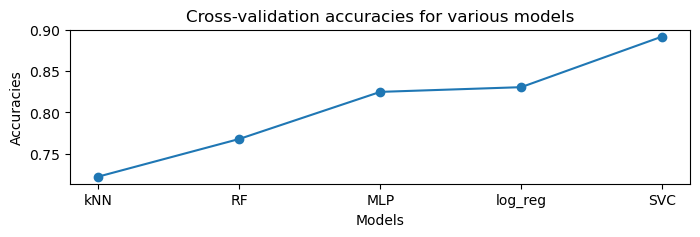

In [67]:
plt.figure(figsize = (8,2))
plt.plot(accuracies_s, '-o')
plt.xticks(ticks = [i for i in range(len(Models_s))], labels = Models_s)
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Cross-validation accuracies for various models')
plt.show()